# Inferential Statistics Assignment

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# use credit card fraud dataset
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/credit_card_fraud.csv'

### Read the credit card fraud dataset into a Pandas data frame.

In [20]:
data = pd.read_csv(data_url)
data

,transaction,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,DEBIT,7414.00,C446504763,151707.00,144293.00,C1854925027,39000000.00,39900000.00,0
1,2,DEBIT,2899.20,C757752441,0.00,0.00,C1854925027,39000000.00,39000000.00,0
2,3,CASH_OUT,17447.35,C1004533006,0.00,0.00,C1620573488,34400000.00,35000000.00,0
3,4,CASH_OUT,477.53,C23579491,0.00,0.00,C356023140,33800000.00,33800000.00,0
4,5,CASH_IN,18184.97,C861745646,6101058.91,6119243.88,C356023140,33800000.00,33800000.00,0
...,...,...,...,...,...,...,...,...,...,...
11956,11957,DEBIT,2611.84,C876985514,0.00,0.00,C642761478,1228477.53,1231089.37,0
11957,11958,CASH_OUT,9892.79,C380605716,29914.00,20021.21,C1759103419,1220829.58,1230722.38,0
11958,11959,CASH_IN,9155.33,C1775622701,304691.95,313847.29,C2054934604,1239850.50,1230695.17,1
11959,11960,DEBIT,3892.49,C480528249,0.00,0.00,C1470476851,1160634.18,1230659.58,0


### Generate a histogram that shows the data distribution of the "amount" field in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efff6fb70f0>]],
      dtype=object)

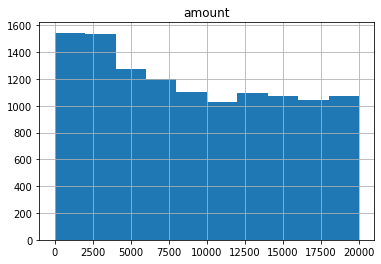

In [6]:
data.hist(column='amount')

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the "amount" field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [19]:
mean = data.sample(n=1000, replace=True)['amount'].mean()
mean

9192.983809999998

### Bootstrap a sampling distribution for the "amount" field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

(array([  15.,   67.,  319.,  842., 1364., 1339.,  745.,  249.,   54.,
           6.]),
 array([9042.58686481, 9082.27781933, 9121.96877385, 9161.65972837,
        9201.35068289, 9241.0416374 , 9280.73259192, 9320.42354644,
        9360.11450096, 9399.80545548, 9439.49641   ]),
 <a list of 10 Patch objects>)

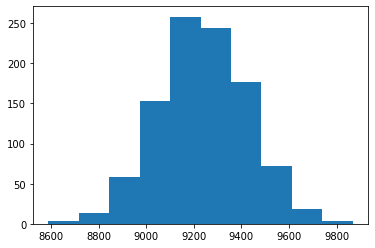

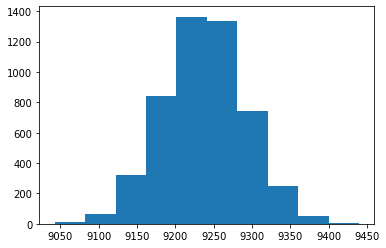

In [15]:
means_1000_1000 = [data.sample(n=1000, replace=True)['amount'].mean() for i in range(1000)]
means_11961_5000 = [data.sample(n=11961, replace=True)['amount'].mean() for i in range(5000)]
plt.figure()
plt.hist(means_1000_1000)
plt.figure()
plt.hist(means_11961_5000)

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of credit card fraud rates that may have resulted in the observed amount of fraud we see in the data. Hint: You'll want to look at the "isFraud" and "transaction" fields to help you.

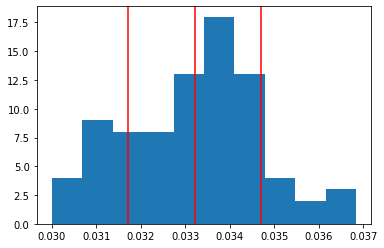

In [52]:
fraud = data.groupby('isFraud').agg({'transaction':'count'})
observed = fraud['transaction'][1]
transactions = len(data)
fraudRate = observed / transactions

results = []

for i in range(1000000):
  param = np.random.random()
  result = np.random.binomial(transactions, param)
  if result == observed:
    results.append(param)
mean = np.mean(results)
sd = np.std(results)
plt.hist(results)
plt.axvline(x=mean, color='red')
plt.axvline(x=mean+sd, color='red')
plt.axvline(x=mean-sd, color='red')


